<a href="https://colab.research.google.com/github/RishitaChawla19/Intro_to_ML/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount the Content

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
file_path = "/content/drive/MyDrive/Colab Notebooks/D3.xlsx"

In [ ]:
df = pd.read_excel(file_path) # Data of the excel file in the form of table

In [ ]:
# Extract X and Y
X1 = df[['X1']].values  # First explanatory variable


X2 = df[['X2']].values  # Second explanatory variable
X3 = df[['X3']].values  # Third explanatory variable
y = df[['Y']].values  # Target variable

In [ ]:
# Normalize features
def normalize_feature(X):
    return (X - np.mean(X)) / np.std(X)

In [ ]:
X1 = normalize_feature(df[['X1']].values)
X2 = normalize_feature(df[['X2']].values)
X3 = normalize_feature(df[['X3']].values)
y = df[['Y']].values.reshape(-1, 1)

In [ ]:
X1 = np.c_[np.ones(len(X1)), X1]
X2 = np.c_[np.ones(len(X2)), X2]
X3 = np.c_[np.ones(len(X3)), X3]

In [ ]:
# Gradient Descent Function
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        predictions = X.dot(theta)
        theta -= (alpha / m) * (X.T.dot(predictions - y))
        cost_history.append((1 / (2 * m)) * np.sum((predictions - y) ** 2))

    return theta, cost_history

In [ ]:
# Initialize parameters
theta = np.zeros((2, 1))
alpha = 0.01
iterations = 1000

In [ ]:

theta1, cost1 = gradient_descent(X1, y, np.zeros((2, 1)).copy(), alpha, iterations)
theta2, cost2 = gradient_descent(X2, y, np.zeros((2, 1)).copy(), alpha, iterations)
theta3, cost3 = gradient_descent(X3, y, np.zeros((2, 1)).copy(), alpha, iterations)


In [ ]:
print(f"Final parameters for X1: {theta1.ravel()},")

print(f"Final loss for X1: {cost1[-1]},")

Final parameters for X1: [ 1.85119573 -2.37722133],
Final loss for X1: 0.9849930911727964,


In [ ]:
print(f"Final parameters for X3: {theta3.ravel()}")
print(f"Final loss for X3: {cost3[-1]},")

Final parameters for X3: [ 1.85119573 -0.60226391]
Final loss for X3: 3.62945112821142,


In [ ]:
# Print final parameters


print(f"Final parameters for X2: {theta2.ravel()}")
print(f"Final loss for X2: {cost2[-1]},")


Final parameters for X2: [1.85119573 0.65029749]
Final loss for X2: 3.599366021828757,


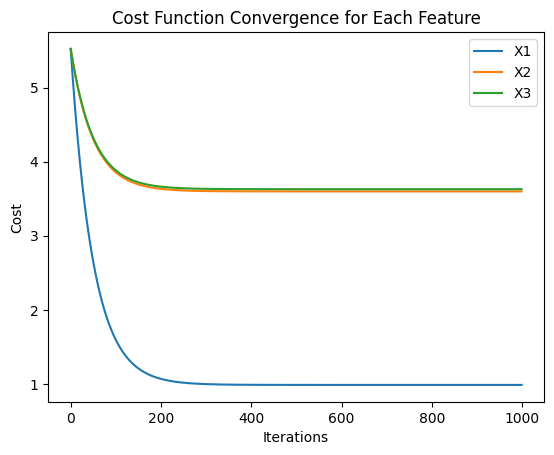

In [ ]:
# Plot cost function history
plt.plot(cost1, label='X1')
plt.plot(cost2, label='X2')
plt.plot(cost3, label='X3')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost Function Convergence for Each Feature')
plt.show()

In [ ]:
# Hyperparameters
alpha_values = [0.1, 0.05, 0.01]  # Learning rates
iterations = 1000

In [ ]:

# Train models for each variable
theta_results = {}
cost_results = {}

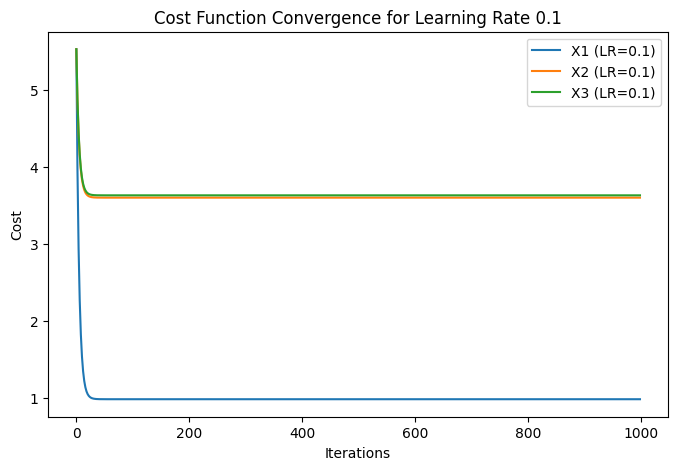

Final parameters for X1 (LR=0.1): [ 1.85127565 -2.37732396], Final Loss: 0.9849930825405945
Final parameters for X2 (LR=0.1): [1.85127565 0.65032557], Final Loss: 3.5993660181680416
Final parameters for X3 (LR=0.1): [ 1.85127565 -0.60228991], Final Loss: 3.6294511246079155



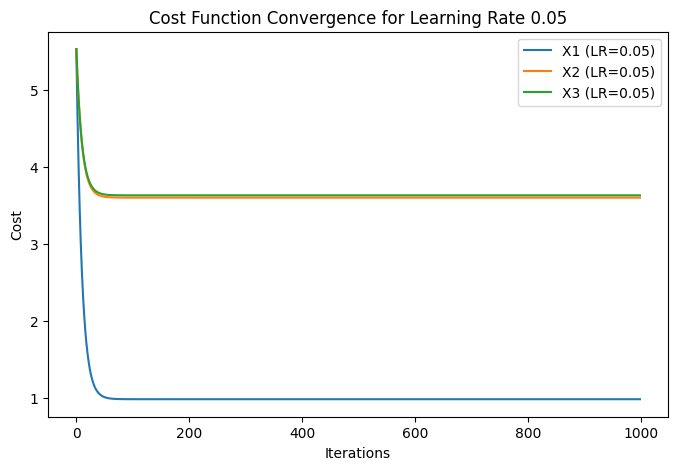

Final parameters for X1 (LR=0.05): [ 1.85127565 -2.37732396], Final Loss: 0.9849930825405946
Final parameters for X2 (LR=0.05): [1.85127565 0.65032557], Final Loss: 3.5993660181680425
Final parameters for X3 (LR=0.05): [ 1.85127565 -0.60228991], Final Loss: 3.629451124607915



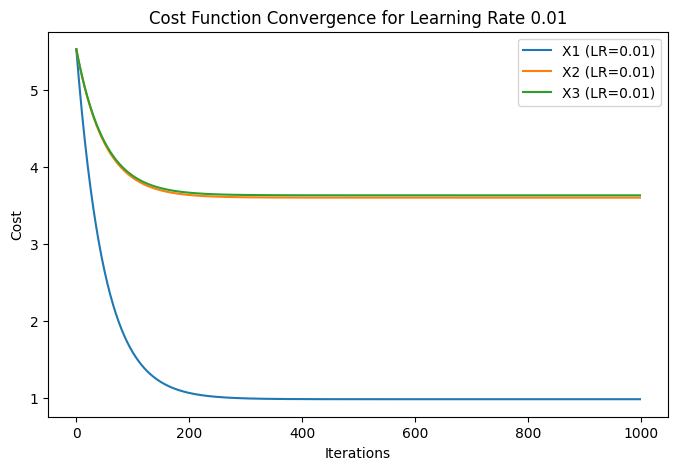

Final parameters for X1 (LR=0.01): [ 1.85119573 -2.37722133], Final Loss: 0.9849930911727964
Final parameters for X2 (LR=0.01): [1.85119573 0.65029749], Final Loss: 3.599366021828757
Final parameters for X3 (LR=0.01): [ 1.85119573 -0.60226391], Final Loss: 3.62945112821142



In [ ]:
for alpha in alpha_values:
    theta1, cost1 = gradient_descent(X1, y, np.zeros((2, 1)), alpha, iterations)
    theta2, cost2 = gradient_descent(X2, y, np.zeros((2, 1)), alpha, iterations)
    theta3, cost3 = gradient_descent(X3, y, np.zeros((2, 1)), alpha, iterations)

    theta_results[alpha] = {'x1': theta1, 'x2': theta2, 'x3': theta3}
    cost_results[alpha] = {'x1': cost1, 'x2': cost2, 'x3': cost3}


    # Plot the loss function over iterations
    plt.figure(figsize=(8, 5))
    plt.plot(cost1, label=f'X1 (LR={alpha})')
    plt.plot(cost2, label=f'X2 (LR={alpha})')
    plt.plot(cost3, label=f'X3 (LR={alpha})')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.legend()
    plt.title(f'Cost Function Convergence for Learning Rate {alpha}')
    plt.show()

     # Print final parameters and final loss for each feature
    final_loss1 = cost1[-1]
    final_loss2 = cost2[-1]
    final_loss3 = cost3[-1]

    print(f"Final parameters for X1 (LR={alpha}): {theta1.ravel()}, Final Loss: {final_loss1}")
    print(f"Final parameters for X2 (LR={alpha}): {theta2.ravel()}, Final Loss: {final_loss2}")
    print(f"Final parameters for X3 (LR={alpha}): {theta3.ravel()}, Final Loss: {final_loss3}\n")



In [ ]:


# Find the best explanatory variable
best_var = None
best_loss = float('inf')
best_lr = None

for alpha in alpha_values:
    for var in ['x1', 'x2', 'x3']:
        final_loss = cost_results[alpha][var][-1]
        if final_loss < best_loss:
            best_loss = final_loss
            best_var = var
            best_lr = alpha

print(f"The best explanatory variable is {best_var} with learning rate {best_lr} and final loss {best_loss:.4f}")




The best explanatory variable is x1 with learning rate 0.1 and final loss 0.9850


**Exercise** **2**

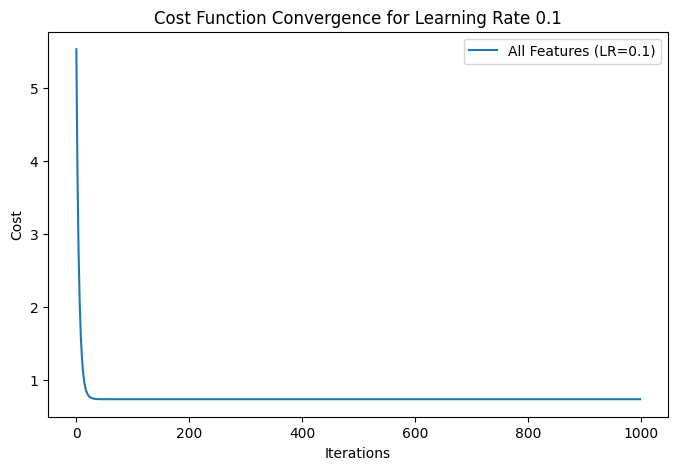

Final parameters for all features (LR=0.1): [ 1.85127565 -2.33694953  0.62111698 -0.3073479 ]
Final loss for all features (LR=0.1): 0.7384642415682942



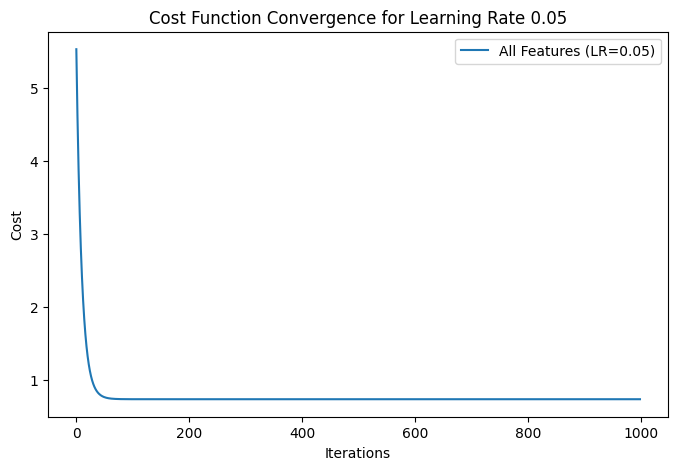

Final parameters for all features (LR=0.05): [ 1.85127565 -2.33694953  0.62111698 -0.3073479 ]
Final loss for all features (LR=0.05): 0.7384642415682943



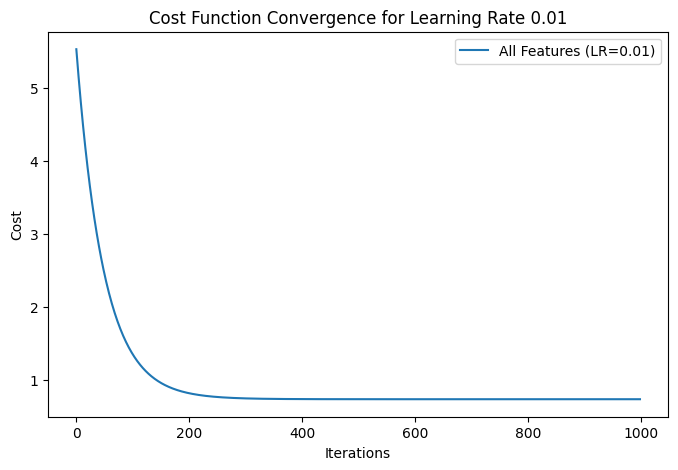

Final parameters for all features (LR=0.01): [ 1.85119573 -2.33678636  0.62107814 -0.30748381]
Final loss for all features (LR=0.01): 0.7384642657688898

Best learning rate: 0.1
Best parameters: [ 1.85127565 -2.33694953  0.62111698 -0.3073479 ]
Best final loss: 0.7384642415682942
Predicted y for [1. 1. 1.]: -0.17190479853021712
Predicted y for [2. 0. 4.]: -4.052015015506347
Predicted y for [3. 2. 1.]: -4.224686870287797


In [ ]:
# Combine all explanatory variables into a single feature matrix
X_all = np.hstack((X1[:, 1:], X2[:, 1:], X3[:, 1:]))  # Remove extra ones column from individual Xs
X_all = np.c_[np.ones(len(X_all)), X_all]  # Add bias term (column of ones)

# Initialize parameters
theta_all = np.zeros((X_all.shape[1], 1))

# Hyperparameters
alpha_values = [0.1, 0.05, 0.01]  # Learning rates
iterations = 1000

theta_all_results = {}
cost_all_results = {}

# Train model using all three variables
for alpha in alpha_values:
    theta_all, cost_all = gradient_descent(X_all, y, np.zeros((X_all.shape[1], 1)), alpha, iterations)
    theta_all_results[alpha] = theta_all
    cost_all_results[alpha] = cost_all

    # Plot loss function over iterations
    plt.figure(figsize=(8, 5))
    plt.plot(cost_all, label=f'All Features (LR={alpha})')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.legend()
    plt.title(f'Cost Function Convergence for Learning Rate {alpha}')
    plt.show()

    print(f"Final parameters for all features (LR={alpha}): {theta_all.ravel()}")
    print(f"Final loss for all features (LR={alpha}): {cost_all[-1]}\n")

# Find the best model
best_alpha = min(cost_all_results, key=lambda a: cost_all_results[a][-1])
best_theta = theta_all_results[best_alpha]
best_loss = cost_all_results[best_alpha][-1]

print(f"Best learning rate: {best_alpha}")
print(f"Best parameters: {best_theta.ravel()}")
print(f"Best final loss: {best_loss}")

# Predict y for new x values
new_x_values = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])
new_x_values = np.c_[np.ones(len(new_x_values)), new_x_values]  # Add bias term

predictions = new_x_values.dot(best_theta)

# Print predictions
for i, x in enumerate(new_x_values[:, 1:]):
    print(f"Predicted y for {x}: {predictions[i][0]}")
